In [1]:
import pandas as pd
import altair as alt

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

# Import Data

In [2]:
depression_pre = pd.read_csv('../../data/depression_pre_features_tfidf_256.csv')
depression_post = pd.read_csv('../../data/depression_post_features_tfidf_256.csv')

In [3]:
depression_pre.head(3)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,depression,What_I_do_45,2019/08/28,I want to enjoy relationships with people but ...,2.516962,4.466233,4.462510,82.994771,76.849162,7.491760,...,0.0,0.0,0.0,0.054901,0.0,0.0,0.0,0.0,0.0,0.0
1,depression,Bleumoon_Selene,2019/08/28,I didn't ask to be here. I didn't ask to be bo...,-0.320874,1.249635,2.174573,97.817393,84.242718,6.061748,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,depression,Karuderu,2019/08/28,"I don't know, If i can't handle anything anymo...",0.514747,2.011439,2.431083,97.352339,81.258065,4.944700,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
depression_pre.tail(3)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
21206,depression,OfficialCasualCat,2018/11/20,I feel like how much/hard I work is insignific...,2.775928,3.852236,3.667931,92.604788,74.229885,7.192927,...,0.0,0.0,0.0,0.303945,0.0,0.0,0.0,0.000000,0.0,0.0
21207,depression,ArmchairModel,2018/11/20,This Website Shows You What You'd Look Like If...,2.695333,4.932886,3.209444,80.067500,109.222222,5.355556,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
21208,depression,ztvrjnf,2018/11/20,Does anybody else have these moments? You have...,3.077250,5.592851,3.060000,90.935000,77.583333,5.666667,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.235934,0.0,0.0


## Features

1. The published paper, from which the dataset is cited, has an in depth breakdown of the features which can be found here: [https://www.jmir.org/2020/10/e22635/](https://www.jmir.org/2020/10/e22635/).  

2. The question we are asking is:  How has the substance use increased over the pandemic?
  
- Feature of interest: `substance_use_total`
  
- In order to accomplish our EDA task for Sunday 21st November, we will have to filter our dataset - and associated EDA tasks - to focus exclusively on this feature.

## High level analysis

The question we are asking is *How has the substance use increased over the pandemic?*. 
For this project we have selected _one_ feature of interest: `substance_use_total`. In order to accomplish our EDA task for Sunday 21st November, we will have to filter our dataset - and associated EDA tasks - to focus exclusively on this feature.

In [5]:
columns_of_interest = ['subreddit', 'author', 'date', 'post', 'substance_use_total']

depression_pre = depression_pre.loc[:, columns_of_interest]
depression_post = depression_post.loc[:, columns_of_interest]

In [6]:
depression_pre.head(5)

,subreddit,author,date,post,substance_use_total
0,depression,What_I_do_45,2019/08/28,I want to enjoy relationships with people but ...,4
1,depression,Bleumoon_Selene,2019/08/28,I didn't ask to be here. I didn't ask to be bo...,0
2,depression,Karuderu,2019/08/28,"I don't know, If i can't handle anything anymo...",0
3,depression,ThisNotMyMainAcc,2019/08/28,I want to know what it feels like to feel genu...,0
4,depression,edgelord3045,2019/08/28,It doesn't even matter I know this will most l...,0


In [7]:
depression_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21209 entries, 0 to 21208
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            21209 non-null  object
 1   author               21209 non-null  object
 2   date                 21209 non-null  object
 3   post                 21209 non-null  object
 4   substance_use_total  21209 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 828.6+ KB


In [8]:
depression_post.head(5)

,subreddit,author,date,post,substance_use_total
0,depression,peeepeed,2020/01/01,My heart aches but i cant break Recently my re...,6
1,depression,cookieexpertuser,2020/01/01,Cheers I’m not sure if this is the right sub t...,0
2,depression,Ghostiez23,2020/01/01,Fuck titles. I’m depressed I feel so fucking w...,0
3,depression,wisqrg50,2020/01/01,suffering from low energy I'm not exaggerating...,0
4,depression,arizonwatermelon,2020/01/01,I can already tell This year is just going to ...,0


In [9]:
depression_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38033 entries, 0 to 38032
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            38033 non-null  object
 1   author               38033 non-null  object
 2   date                 38033 non-null  object
 3   post                 38033 non-null  object
 4   substance_use_total  38033 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


### Composition

> There are no missing values from the dataset.

In [10]:
print(f'Total number of records in the pre-pandemic dataset: {len(depression_pre)}')
depression_pre.describe()

Total number of records in the pre-pandemic dataset: 21209


,substance_use_total
count,21209.000000
mean,0.432929
std,0.963372
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,17.000000


In [11]:
print(f'Total number of records in the post-pandemic dataset: {len(depression_post)}')
depression_post.describe()

Total number of records in the post-pandemic dataset: 38033


,substance_use_total
count,38033.000000
mean,0.453580
std,1.070116
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,44.000000


Combining the pre and post into one dataset with a new feature column allows us to compare the data side by side

In [12]:
depression_pre['period'] = 'pre'
depression_post['period'] = 'post'

depression_df = pd.concat([depression_post, depression_pre])
depression_df

,subreddit,author,date,post,substance_use_total,period
0,depression,peeepeed,2020/01/01,My heart aches but i cant break Recently my re...,6,post
1,depression,cookieexpertuser,2020/01/01,Cheers I’m not sure if this is the right sub t...,0,post
2,depression,Ghostiez23,2020/01/01,Fuck titles. I’m depressed I feel so fucking w...,0,post
3,depression,wisqrg50,2020/01/01,suffering from low energy I'm not exaggerating...,0,post
4,depression,arizonwatermelon,2020/01/01,I can already tell This year is just going to ...,0,post
...,...,...,...,...,...,...
21204,depression,CrisStreamz,2018/11/20,My life sucks right now I can’t hold down a jo...,0,pre
21205,depression,vyletriot,2018/11/20,I Can't Cry? Does anyone else have this proble...,0,pre
21206,depression,OfficialCasualCat,2018/11/20,I feel like how much/hard I work is insignific...,0,pre
21207,depression,ArmchairModel,2018/11/20,This Website Shows You What You'd Look Like If...,0,pre


### Visualization

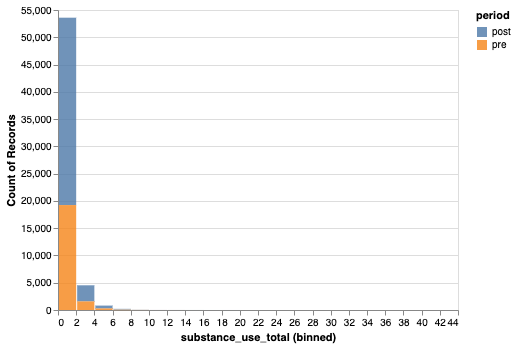

In [13]:
alt.Chart(depression_df).mark_bar(opacity=0.8).encode(
    x=alt.X('substance_use_total', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='period'
)

In [14]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(depression_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(depression_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 21209
Number of unique authors (posters) in 'post' dataset: 38033


**From above figures, it can be summarized that:**

1. Each observation in each dataset is associated with a unique reddit user.
2. There are more unique authors posting in this subreddit post pandemic although the `post` dataset covers a 4-month period while the `pre` data set covers a whole year period. 
3. The `substance_use_total` `post` pandemic is higher as shown in the plot. 